# ЗАДАЧА №2. Мошенники (Задача Каспи Банк)
#### Вы работаете в крупной компании "рога и копыта". Ваша задача выявлять мошенников среди клентской базы.
#### Для этого, у вас имеются 2 витрины данных «train» и «test». Они содержат информацию о клиентах компании , где поле NUM это ID клиента.
#### В витрине train поле target показывает, кто из клиентов является мошенником (1- мошенник / 0 – обычный клиент)
#### Ваша задача - классифицировать витрину «test» и проставить в ней аналогичный флаг мошенника. 

Результат по кейсам должен содержать:
Результат кейса №2: формат Excel. 
В файле должен быть только один лист и содержать 2 столбца : NUM и  TARGET (прогнозный по витрине "Мошенники_test"). Не должно быть скрытых страниц и столбцов.  Записи должны начинаться с ячейки А1

## Вначале подключим библиотеки

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Загружаем данные 

In [4]:
data = pd.read_csv('train.csv', delimiter=";", encoding="windows-1251")
test = pd.read_csv('test.csv', delimiter=";", encoding="windows-1251")

## Анализируем данные

Узнаем размеры таблицы:

In [5]:
data.shape

(30000, 132)

In [6]:
test.shape

(10000, 131)

Итак, таблица с данными для обучения содержит 30000 строк (объектов) и 132 столбца (признаков), включая выходной (целевой) признак.

Таблица с данным для тестирования модели содержит 10000 строк (объектов) и 131 столбца (признаков).

Далее мы создадим отдельный вектор **y** с выходной (целевой) признак - ответом и удалим его из таблицы с данными для обучения.

In [7]:
y = data['TARGET']
data = data.drop(('TARGET'), axis=1)

Объеденим обе таблицы с данными.
Узнаем размер новой большой таблицы.
Так же мы можем посмотреть на несколько первых и несколько последних строк этой таблицы, чтобы получить представление об имеющихся данных:

In [8]:
data = pd.concat((data, test), axis=0)

In [9]:
data.shape

(40000, 131)

In [10]:
data.head()

,NUM,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129
0,0,0.0,1.0,1.0,199900.0,0.0,1.0,0.0,1.0,0.0,...,СТЕПЕНЬ,8.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,СТЕПЕНЬ,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,СПЕЦ,5.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,3,2.0,10.0,1.0,1187750.0,130990.0,6.0,0.0,2.0,0.0,...,СТЕПЕНЬ,5.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4,0.0,5.0,4.0,318771.0,0.0,4.0,0.0,1.0,0.0,...,СТЕПЕНЬ,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
data.tail()

,NUM,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F120,F121,F122,F123,F124,F125,F126,F127,F128,F129
9995,39995,0.0,2.0,1.000000,397900.000000,0.0,2.0,0.0,1.0,0.000000,...,СПЕЦ,5.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
9996,39996,0.0,3.0,1.899835,912571.797183,0.0,2.0,0.0,1.0,1.899835,...,СПЕЦ,5.300494,0.0,0.0,0.0,0.100165,0.100165,1.0,0.0,0.0
9997,39997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,СРЕПЕНЬ,5.000000,1.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0
9998,39998,0.0,8.0,3.000000,586943.000000,0.0,5.0,0.0,1.0,0.000000,...,НЕОК ВЫСШ,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
9999,39999,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,ВЫСШ,5.000000,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0


Выделим числовые и категориальные признаки:

In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['F120']
['NUM', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41', 'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51', 'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61', 'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71', 'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81', 'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91', 'F92', 'F93', 'F94', 'F95', 'F96', 'F97', 'F98', 'F99', 'F100', 'F101', 'F102', 'F103', 'F104', 'F105', 'F106', 'F107', 'F108', 'F109', 'F110', 'F111', 'F112', 'F113', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F121', 'F122', 'F123', 'F124', 'F125', 'F126', 'F127', 'F128', 'F129']


Теперь мы можем получить некоторую общую информацию по категориальным признакам:

In [13]:
data[categorical_columns].describe()

,F120
count,40000
unique,9
top,ВЫСШ
freq,14402


В таблице для каждого категориального признака приведено общее число заполненных ячеек (count), количество значений, которые принимает данный признак (unique), самое популярное (часто встречающееся) значение этого признака (top) и количество объектов, в которых встречается самое частое значение данного признака (freq).

## Пропущенные значения 

Узнать количество заполненных (непропущенных) элементов можно с помощью метода count. Параметр axis = 0 указывает, что мы двигаемся по размерности 0 (сверху вниз), а не размерности 1 (слева направо), т.е. нас интересует количество заполненных элементов в каждом столбце, а не строке:

In [14]:
data.count(axis=0)

NUM     40000
F0      40000
F1      40000
F2      40000
F3      40000
F4      40000
F5      40000
F6      40000
F7      40000
F8      40000
F9      40000
F10     40000
F11     40000
F12     33127
F13     40000
F14     40000
F15     19178
F16     40000
F17     40000
F18     40000
F19     40000
F20     40000
F21     40000
F22     40000
F23     40000
F24     40000
F25     40000
F26     40000
F27     40000
F28     40000
        ...  
F100    40000
F101    40000
F102    40000
F103    40000
F104    40000
F105    40000
F106    40000
F107    40000
F108    40000
F109    40000
F110    40000
F111    40000
F112    40000
F113    40000
F114    40000
F115    40000
F116    40000
F117    40000
F118    40000
F119    40000
F120    40000
F121    40000
F122    40000
F123    40000
F124    40000
F125    40000
F126    40000
F127    40000
F128    40000
F129    40000
Length: 131, dtype: int64

Если данные содержат пропущенные значения, то имеется две простые альтернативы:

- удалить столбцы с такими значениями (data = data.dropna(axis=1)),
- удалить строки с такими значениями (data = data.dropna(axis=0)).

После этого, к сожалению, данных может стать совсем мало, поэтому рассмотрим простые альтернативные способы.

### Количественные признаки 

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

axis=0 по-прежнему указывает, что мы двигаемся сверху вниз:

In [15]:
data = data.fillna(data.median(axis=0), axis=0)

Проверим, что теперь все столбцы, соответствующие количественным признакам, заполнены.

In [16]:
data.count(axis=0)

NUM     40000
F0      40000
F1      40000
F2      40000
F3      40000
F4      40000
F5      40000
F6      40000
F7      40000
F8      40000
F9      40000
F10     40000
F11     40000
F12     40000
F13     40000
F14     40000
F15     40000
F16     40000
F17     40000
F18     40000
F19     40000
F20     40000
F21     40000
F22     40000
F23     40000
F24     40000
F25     40000
F26     40000
F27     40000
F28     40000
        ...  
F100    40000
F101    40000
F102    40000
F103    40000
F104    40000
F105    40000
F106    40000
F107    40000
F108    40000
F109    40000
F110    40000
F111    40000
F112    40000
F113    40000
F114    40000
F115    40000
F116    40000
F117    40000
F118    40000
F119    40000
F120    40000
F121    40000
F122    40000
F123    40000
F124    40000
F125    40000
F126    40000
F127    40000
F128    40000
F129    40000
Length: 131, dtype: int64

### Категориальные признаки

Теперь рассмотрим пропущенные значения в столбцах, соответствующих категориальным признакам. Простая стратегия – заполнение пропущенных значений самым популярным в столбце.

In [17]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

Теперь все элементы таблицы заполнены:

In [18]:
data.describe(include=[object])

,F120
count,40000
unique,9
top,ВЫСШ
freq,14402


In [19]:
data.describe()

,NUM,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F119,F121,F122,F123,F124,F125,F126,F127,F128,F129
count,40000.00000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,0.531442,4.341344,1.477633,1.942657e+06,8.991082e+04,2.465239,0.131690,0.601022,0.350602,...,3.797783,5.572943,0.155121,0.066054,0.021682,0.160692,0.336003,0.487501,0.046756,0.038569
std,11547.14972,1.416934,13.975376,3.259655,8.192308e+06,2.642161e+05,5.893108,0.576513,0.826670,1.001883,...,2.329974,2.552055,0.354993,0.245125,0.141167,0.358625,0.464378,0.491818,0.206372,0.187112
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19999.50000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240601,0.000000,0.000000
75%,29999.25000,0.000000,3.000000,1.000000,6.687750e+05,0.000000e+00,2.000000,0.000000,1.000000,0.000000,...,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,39999.00000,15.000000,218.000000,31.000000,1.148520e+08,2.681200e+06,61.000000,10.000000,8.000000,14.000000,...,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Векторизация 

Библиотека scikit-learn не умеет напрямую обрабатывать категориальные признаки. Поэтому прежде чем подавать данные на вход алгоритмов машинного обучения преобразуем категориальные признаки в количественные.

Категориальные признаки, принимающие два значения (т.е. бинарные признаки) и принимающие большее количество значений будем обрабатывать по-разному.

Вначале выделим бинарные и небинарные признаки:

In [20]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

[] ['F120']


### Небинарные признаки

Бинарных признаков у нас нет. Переходим к небинарным. 

К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, признак A4 принимает 3 различных значения 'u', 'y', 'l'
    
Заменим признак A4 тремя признаками: A4_u, A4_y, A4_l.

- Если признак A4 принимает значение u, то признак A4_u равен 1, A4_y равен 0, A4_l равен 0.
- Если признак A4 принимает значение y, то признак A4_y равен 0, A4_y равен 1, A4_l равен 0.
- Если признак A4 принимает значение l, то признак A4_l равен 0, A4_y равен 0, A4_l равен 1.

Такую векторизацию осуществляет в pandas метод get_dummies:

In [21]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['F120_ВЫСШ', 'F120_НЕОК ВЫСШ', 'F120_НЕТ', 'F120_ПРОФИЛЬ', 'F120_СПЕЦ',
       'F120_СРЕДН', 'F120_СРЕПЕНЬ', 'F120_СТЕПЕНЬ', 'F120_ШКОЛ'],
      dtype='object')


## Нормализация количественных признаков 

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак можно привести к нулевому среднему и единичному среднеквадратичному отклонению. Но в данной задаче мы это делать не будем

In [22]:
data_numerical = data[numerical_columns]
# data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,NUM,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F119,F121,F122,F123,F124,F125,F126,F127,F128,F129
count,40000.00000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,0.531442,4.341344,1.477633,1.942657e+06,8.991082e+04,2.465239,0.131690,0.601022,0.350602,...,3.797783,5.572943,0.155121,0.066054,0.021682,0.160692,0.336003,0.487501,0.046756,0.038569
std,11547.14972,1.416934,13.975376,3.259655,8.192308e+06,2.642161e+05,5.893108,0.576513,0.826670,1.001883,...,2.329974,2.552055,0.354993,0.245125,0.141167,0.358625,0.464378,0.491818,0.206372,0.187112
min,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19999.50000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240601,0.000000,0.000000
75%,29999.25000,0.000000,3.000000,1.000000,6.687750e+05,0.000000e+00,2.000000,0.000000,1.000000,0.000000,...,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,39999.00000,15.000000,218.000000,31.000000,1.148520e+08,2.681200e+06,61.000000,10.000000,8.000000,14.000000,...,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Соединяем все в одну таблицу

In [23]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(40000, 139)
Index(['NUM', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       ...
       'F129', 'F120_ВЫСШ', 'F120_НЕОК ВЫСШ', 'F120_НЕТ', 'F120_ПРОФИЛЬ',
       'F120_СПЕЦ', 'F120_СРЕДН', 'F120_СРЕПЕНЬ', 'F120_СТЕПЕНЬ', 'F120_ШКОЛ'],
      dtype='object', length=139)


Для удобства отдельно рассмотрим столбцы, соответствующие входным признакам (это будет матрица X)

In [24]:
X = data
feature_names = X.columns
print (feature_names)

Index(['NUM', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       ...
       'F129', 'F120_ВЫСШ', 'F120_НЕОК ВЫСШ', 'F120_НЕТ', 'F120_ПРОФИЛЬ',
       'F120_СПЕЦ', 'F120_СРЕДН', 'F120_СРЕПЕНЬ', 'F120_СТЕПЕНЬ', 'F120_ШКОЛ'],
      dtype='object', length=139)


In [25]:
print (X.shape)
print (X.columns)
print (y.shape)
N, d = X.shape

(40000, 139)
Index(['NUM', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       ...
       'F129', 'F120_ВЫСШ', 'F120_НЕОК ВЫСШ', 'F120_НЕТ', 'F120_ПРОФИЛЬ',
       'F120_СПЕЦ', 'F120_СРЕДН', 'F120_СРЕПЕНЬ', 'F120_СТЕПЕНЬ', 'F120_ШКОЛ'],
      dtype='object', length=139)
(30000,)


Теперь у нас 139 входных признака

## Обучающая и тестовая выборки

Почти все готово, чтобы запустить алгоритмы машинного обучения.

Разобъем нашу большу таблицу на две. Тренировочную и тестовую:

In [26]:
X_train = data[:30000]
X_test = data[30000:]

Обучаться, или, как говорят, строить модель, мы будем на обучающей выборке, а проверять качество построенной модели – на тестовой.

В рассматриваемой задаче мы сами разобьем имеющиеся у нас данные на обучающую и тестовую выборки.

Разбиение на тестовую и обучающую выборку должно быть случайным. Обычно используют разбиения в пропорции 50%:50%, 60%:40%, 75%:25% и т.д.

Мы воспользуемся функцией train_test_split из модуля sklearn.cross_validation. и разобьем данные на обучающую/тестовую выборки в отношении 70%:30%

In [27]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(X_train, y, test_size = 0.3, random_state = 11)

N_train, _ = train.shape 
N_test,  _ = test.shape 
print (N_train, N_test)

21000 9000


train, y_train – это обучающая выборка, test, y_test – тестовая.

## Алгоритм машинного обучения - Random Forest – случайный лес

Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес – Random Forest.

Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:
- fit(X, y) - обучение (тренировка) модели на обучающей выборке X, y
- predict(X) - предсказание на данных X

In [29]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

После того, как модель обучена, мы можем предсказывать значение целевого признака по входным признакам для новых объектов. Делается это с помощью метода predict.

Нас интересует качество построенной модели, поэтому будем предсказывать значение выходного признака на тех данных, для которых оно известно: на обучающей и (что более важно) тестовой выборках:

In [31]:
err_train = np.mean(y_train != rf.predict(train))
err_test  = np.mean(y_test  != rf.predict(test))
print (err_train, err_test)

0.0 0.0615555555556


err_train и err_test – это ошибки на обучающей и тестовой выборках. Как мы видим, они составили 0.0% и 6%.

Мы получили хороший результат. Решим теперь задачу целиком и выгрузим данные в CSV файл

In [33]:
rf.fit(X_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [34]:
a = rf.predict(X_test)
pd.DataFrame(a).to_csv('prediction.csv')
print(a)

[ 0.  0.  0. ...,  0.  0.  1.]


### Отбор признаков (Feature Selection) с помощью алгоритма случайного леса 

Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Отбор признаков необходим для следующих целей:

- Для лучшего понимания задачи. Человеку легче разобраться с небольшим количеством признаков, чем с огромным их количеством.
- Для ускорения алгоритмов.
- Для улучшения качества предсказания. Устранение шумовых признаков может уменьшить ошибку алгоритма на тестовой выборке, т.е. улучшить качество предсказания.

Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:

In [35]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'F47  ' (0.0330)
 2. feature 'F46  ' (0.0275)
 3. feature 'F54  ' (0.0271)
 4. feature 'F120_НЕТ' (0.0261)
 5. feature 'F36  ' (0.0252)
 6. feature 'F59  ' (0.0247)
 7. feature 'F30  ' (0.0242)
 8. feature 'F52  ' (0.0233)
 9. feature 'F108 ' (0.0213)
10. feature 'F109 ' (0.0201)
11. feature 'F38  ' (0.0196)
12. feature 'F58  ' (0.0192)
13. feature 'F3   ' (0.0170)
14. feature 'F34  ' (0.0165)
15. feature 'F55  ' (0.0159)
16. feature 'F32  ' (0.0157)
17. feature 'F39  ' (0.0151)
18. feature 'F126 ' (0.0150)
19. feature 'F112 ' (0.0149)
20. feature 'F31  ' (0.0141)
21. feature 'F29  ' (0.0139)
22. feature 'F20  ' (0.0134)
23. feature 'F65  ' (0.0133)
24. feature 'F63  ' (0.0130)
25. feature 'F2   ' (0.0121)
26. feature 'F51  ' (0.0121)
27. feature 'F53  ' (0.0120)
28. feature 'F118 ' (0.0119)
29. feature 'F61  ' (0.0116)
30. feature 'F68  ' (0.0111)
31. feature 'F19  ' (0.0110)
32. feature 'NUM  ' (0.0109)
33. feature 'F96  ' (0.0109)
34. feature 'F12  '

Построим столбцовую диаграмму, графически представляющую значимость первых 20 признаков:

In [36]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

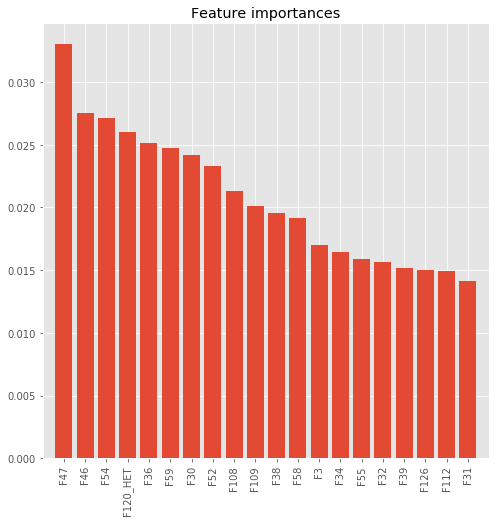

In [37]:
plt.show()

In [38]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['F47', 'F46', 'F54', 'F120_НЕТ', 'F36', 'F59', 'F30', 'F52'], dtype='object')


Мы видим, что основную роль играют признаки F47, F46, F54, F120_НЕТ, F36, F59, F30, F52